[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_6_Numpy_Algebra_Linear.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/master/notebooks/Aula_6_Numpy_Algebra_Linear.ipynb)

# Algebra Linear e `NumPy`

**Objetivos**: Rever conceitos de Álgebra Linear e apresentar a biblioteca `NumPy`.

Recomendo assistirem a série *Essence of Linear Algebra* do canal do YouTube [3blue1brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)



[<img src="https://i.ytimg.com/vi/kjBOesZCoqc/maxresdefault.jpg" alt="Essence of Linear Algebra" style="width: 300px;"/>](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Notação

Matriz $\mathbf{A} \in \mathbb{R}^{m \times n}$

Vetor $\vec{v} \in \mathbb{R}^{n}$

## Matriz

Matriz $\mathbf{A} \in \mathbb{R}^{2 \times 3}$

$$\mathbf{A} = \left[\begin{array}{lll}{1} & {2} & {3} \\ {4} & {5} & {6}\end{array}\right]$$

## Vetor
Vetor $\vec{v} \in \mathbb{R}^{3}$

$$\vec{v} = \left[\begin{array}{l}{1} \\ {2} \\ {3}\end{array}\right]$$


In [1]:
import numpy as np
A = np.array([[1,2,3],
              [4,5,6]])
v = np.array([1,
              2,
              3])
print(A)
print(v)

[[1 2 3]
 [4 5 6]]
[1 2 3]


## Multiplicação de Matrizes

O produto $\mathbf{AB}$ das matrizes $\mathbf{A} \in \mathbb{R}^{m \times \ell}$ e $\mathbf{B} \in \mathbb{R}^{\ell \times n}$ consiste em computar o produto entre cada linha da $\mathbf{A}$ com cada coluna de $\mathbf{B}$:

$$\mathbf{C}=\mathbf{A} \mathbf{B} \quad \Leftrightarrow \quad c_{i j}=\sum_{k=1}^{\ell} a_{i k} b_{k j}, \forall i \in[1, \ldots, m], j \in[1, \ldots, n].$$

$$\left[\begin{array}{ll}{a_{11}} & {a_{12}} \\ {a_{21}} & {a_{22}} \\ {a_{31}} & {a_{32}}\end{array}\right]\left[\begin{array}{ll}{b_{11}} & {b_{12}} \\ {b_{21}} & {b_{22}}\end{array}\right]=\left[\begin{array}{ll}{a_{11} b_{11}+a_{12} b_{21}} & {a_{11} b_{12}+a_{12} b_{22}} \\ {a_{21} b_{11}+a_{22} b_{21}} & {a_{21} b_{12}+a_{22} b_{22}} \\ {a_{31} b_{11}+a_{32} b_{21}} & {a_{31} b_{12}+a_{32} b_{22}}\end{array}\right] \in \mathbb{R}^{3 \times 2}.$$


![matrix-multiplication](https://f0.pngfuel.com/png/267/924/matrix-multiplication-field-row-the-matrix-png-clip-art.png)

### Multiplicação de Vetor por Matriz

$$\textbf{A} \vec{x}=\left[\begin{array}{ccc}
1 & 4 & 5 \\
3 & 2 & 5 \\
2 & 1 & 3
\end{array}\right]\left[\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
1 \\
3 \\
2
\end{array}\right] x_{1}+\left[\begin{array}{c}
4 \\
2 \\
1
\end{array}\right] x_{2}+\left[\begin{array}{c}
5 \\
5 \\
3
\end{array}\right] x_{3}$$

In [2]:
A = np.array([[3,0],
              [0,5],
              [1,5]])
B = np.array([[3,0],
              [0,5]])

np.dot(A,B)

array([[ 9,  0],
       [ 0, 25],
       [ 3, 25]])

## *Digressão* - Por que Matrizes são Importantes?

### Imagens e Filtros

Todo dado estruturado é representado como matrizes no computador. Veja o caso de imagens. Elas são literalmente matrizes multidimensionais.

* Uma imagem colorida é uma Array de dimensão $X \times Y \times 3$:
    * $X$ = quantidade de pixels no eixo horizontal
    * $Y$ = quantidade de pixels no eixo vertical
    * $3$ = são 3 canais de cores - **R**ed, **G**reen e **B**lue

<img src="images/images_as_matrix.png" alt="Row vs Cols" style="width: 500px;"/>

(562, 450)


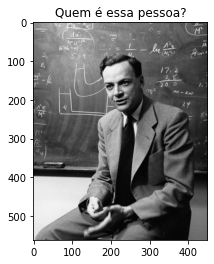

In [3]:
import matplotlib.pyplot as plt

feynman = plt.imread("images/feynman.png")
print(feynman.shape)
plt.imshow(feynman, cmap='gray')
plt.title('Quem é essa pessoa?')
plt.show()

#### Convoluções

<img src="images/convolution.gif" alt="Row vs Cols" style="width: 400px;"/>

In [4]:
from scipy.signal import convolve

#### Filtros

Temos vários. Veja essa [página na Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

##### Detecção de Bordas (*Edge Detection*)

$$
\left[\begin{array}{lll}
{-1} & {-1} & {-1} \\
{-1} & {+8} & {-1} \\
{-1} & {-1} & {-1}
\end{array}\right]
$$

In [5]:
edge_detect = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]]) 

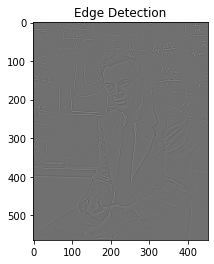

In [6]:
feynman_edge = convolve(feynman, edge_detect)
plt.imshow(feynman_edge, cmap='gray')
plt.title('Edge Detection')
plt.show()

Não ficou muto bom né?

Vamos então usar o [Filtro de Sobel](https://en.wikipedia.org/wiki/Sobel_operator) para bordas verticais e horizontais:

$$\mathbf{G}_{\text{vertical}} = \begin{bmatrix} 
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix}
\quad
\mbox{e}
\quad   
\mathbf{G}_{\text{horizontal}} = \begin{bmatrix} 
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}$$

In [7]:
sobel_vertical = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

In [8]:
sobel_horizontal = np.array([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]])

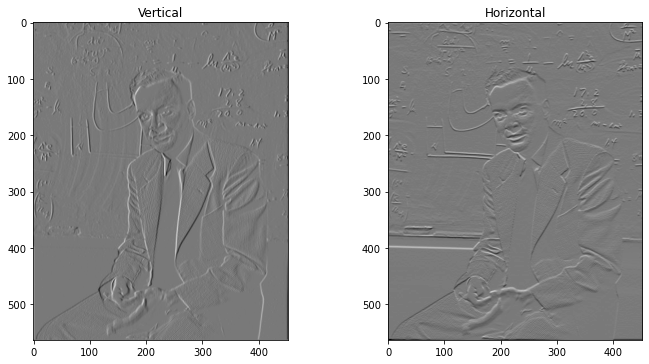

In [9]:
feynman_sobel_vert = convolve(feynman, sobel_vertical)
feynman_sobel_horiz = convolve(feynman, sobel_horizontal)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()
ax[0].imshow(feynman_sobel_vert, cmap='gray')
ax[0].title.set_text('Vertical')
ax[1].imshow(feynman_sobel_horiz, cmap='gray')
ax[1].title.set_text('Horizontal')
plt.show()

##### Aumento de Nitidez (*Sharpen*)

$$
\left[\begin{array}{lll}
{0} & {-1} & {0} \\
{-1} & {+5} & {-1} \\
{0} & {-1} & {0}
\end{array}\right]
$$

In [10]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]]) 

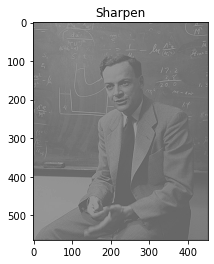

In [11]:
feynman_sharpen = convolve(feynman, sharpen)
plt.imshow(feynman_sharpen, cmap='gray')
plt.title('Sharpen')
plt.show()

##### Desfoque (*Blur*)

$$
\frac{1}{16}
\left[\begin{array}{lll}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{array}\right]
$$

In [12]:
blur = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]]) / 16

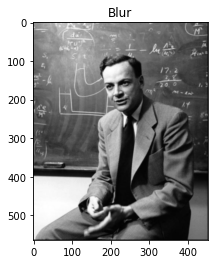

In [13]:
feynman_blur = convolve(feynman, blur)
plt.imshow(feynman_blur, cmap='gray')
plt.title('Blur')
plt.show()

Não ficou muito bom né?

Vamos tentar aumentar o número de passadas do filtro (kernel)

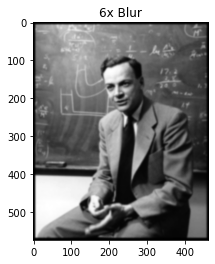

In [14]:
feynman_blur_rep = convolve( # 1
    convolve( # 2
        convolve( # 3
            convolve( # 4
                convolve( # 5
                    convolve(feynman, blur), # 6
                    blur), # 5
                blur), # 4
            blur), # 3
        blur), # 2
    blur) # 1
plt.imshow(feynman_blur_rep, cmap='gray')
plt.title('6x Blur')
plt.show()

Inclusive, convoluções, onde a "máquina" aprende os filtros (os números que vão dentro da matriz), é a base das redes neurais que detectam objetos!

<img src="images/deeplearning_convolutions.gif" alt="Deep Learning Convolutions" style="width: 600px;"/>

## *Digressão 2* - Por que Matrizes são Importantes?

### Regressão

Todo dado estruturado é representado como matrizes no computador. Veja o caso de dados de uma pesquisa:

* $\mathbf{X} \in \mathbb{R}^{m, n}$ = Dados, onde $m$ é o número de linhas (observações) e $n$ o número de colunas (variáveis)
* $\mathbf{y}$ = vetor (variável) que estamos interessados

$$
\mathbf{X} =
\left[\begin{array}{lll}
1.5 & 2.3 \\
2.5 & 4.2 \\
0.4 & 1.2 \\
3.2 & 3.1 \\
\end{array}\right] \quad \text{e} \quad
\mathbf{y} =
\left[\begin{array}{lll}
2.7 \\
3.4 \\
5.2 \\
6.7 \\
\end{array}\right]
$$

Eu quero achar a relação entre as colunas (variáveis) de $\mathbf{X}$ e a resposta $\mathbf{y}$. Particularmente quero achar o tamanho do efeito $(\beta)$ de cada variável de $\mathbf{X}$ em $\mathbf{y}$:

$$\mathbf{X} \cdot \beta = \mathbf{y}$$

Mas temos um sistema de equações com $m = 4$ equações e 2 variáveis $\beta = 2$, ou seja, insolucionável:

$$
\begin{aligned}
1.5\beta_1 &+ 2.3\beta_2 &= 2.7\\
2.5\beta_1 &+ 4.2\beta_2 &= 3.4\\
0.4\beta_1 &+ 1.2\beta_2 &= 5.2\\
3.2\beta_1 &+ 3.1\beta_2 &= 6.7
\end{aligned}
$$

Solução:

Multiplicar os dois lados por $\mathbf{X}^T$:

$$\mathbf{X}^T \mathbf{X} \beta = \mathbf{X}^T \mathbf{y}$$

Rearranjando as coisas:

$$\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $$

In [15]:
X = np.array([[1.5, 2.3],
              [2.5, 4.2],
              [0.4, 1.2],
              [3.2, 3.1]])
y = np.array([2.7, 3.4, 5.2, 6.7])

In [16]:
# (X.T * X)^1 = np.linalg.inv(X.T.dot(X))
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(beta)

[1.40029006 0.39443605]


Pronto! Eu sei que a primeira variável de $\mathbf{X}$ impacta positivamente a resposta $\mathbf{y}$ em $\approx 1.4$ e a segunda variável de $\mathbf{X}$ positivamente em $\approx 0.4$!

## *Digressão 3* - Por que Matrizes são Importantes?

### Redução de Dimensão com *Single Value Decomposition* -- SVD

Eu tenho uma matrix $\mathbf{A}$ que pode ser decomposta em:

$$
\mathbf{A}^{m \times n} = \mathbf{U}^{m \times m} \mathbf{\Sigma}^{m \times n} {\mathbf{V}^{T \space n \times n}}$$

Aonde:

* $\mathbf{U}$: Matriz Ortogonal $\mathbb{R}^{m \times m}$
* $\mathbf{V}^T$: Matriz Ortogonal $\mathbb{R}^{n \times n}$
* $\mathbf{\Sigma}$: Matriz de Valores Singulares, $\Sigma_{ii} = \sigma_i \geq 0, \Sigma_{ij} = 0, i \neq j$

Os números da diagonal de $\mathbf{\Sigma}$ são os **valores singulares**:

* $u_i$ são os vetores de valores singulares à esquerda
* $v_i$ são os vetores de valores singulares à direita

#### Aplicações

- **Compressão de Imagens**: matriz $\mathbf{A}$ é a soma de matrizes com rank-1 $\mathbf{A}^* = \sigma_1 u_1 v^T_1 + \dots + \sigma_n u_n v^T_n$. Pegue a submatriz $\mathbf{A}^*_n$ de $\mathbf{A}$ para obter a compressão desejada.
- **Filtragem Colaborativa**: $\mathbf{U}$ é um vetor de variáveis de usuários. $\mathbf{V}$ é um vetor de variáveis dos items (vídeos, músicas, compras etc.). Usuário $i$ gosta do item $j$: multiplicação de $u_i$ com $v_j$.

#### Compressão de Imagens

In [17]:
U, sigma, VT = np.linalg.svd(feynman)

print(f"Dimensões imagem: {feynman.shape}")
print(f"Dimensões U: {U.shape}")
print(f"Dimensões sigma: {sigma.shape}")
print(f"Dimensões VT: {VT.shape}")

Dimensões imagem: (562, 450)
Dimensões U: (562, 562)
Dimensões sigma: (450,)
Dimensões VT: (450, 450)


##### Reconstrução

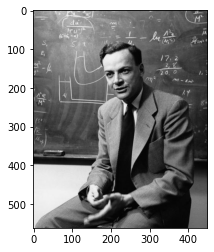

In [18]:
feynman_reconstruido = np.matrix(U[:, :450]) * np.diag(sigma) * np.matrix(VT)
plt.imshow(feynman_reconstruido, cmap='gray')
plt.show()

In [19]:
def compressao_imagem(x, dim):
    U, sigma, VT = np.linalg.svd(x)
    print(f"Número de Valores Singulares: {dim}")
    print(f"Tamanho das Matrizes - U: {U[:, :dim].shape} - sigma: {sigma[:dim].shape} - VT: {VT[:dim, :].shape}")
    print(f"Total de Compressão (Armazenagem): {round((( (dim * 562) + dim + (dim * 450) ) / (562 * 450)) * 100, 2)}%")
    print("------------------------------------------------------")
    return np.matrix(U[:, :dim]) * np.diag(sigma[:dim]) * np.matrix(VT[:dim, :])

feynman_10 = compressao_imagem(feynman, 10)
feynman_50 = compressao_imagem(feynman, 50)
feynman_100 = compressao_imagem(feynman, 100)
feynman_200 = compressao_imagem(feynman, 200)

Número de Valores Singulares: 10
Tamanho das Matrizes - U: (562, 10) - sigma: (10,) - VT: (10, 450)
Total de Compressão (Armazenagem): 4.01%
------------------------------------------------------
Número de Valores Singulares: 50
Tamanho das Matrizes - U: (562, 50) - sigma: (50,) - VT: (50, 450)
Total de Compressão (Armazenagem): 20.03%
------------------------------------------------------
Número de Valores Singulares: 100
Tamanho das Matrizes - U: (562, 100) - sigma: (100,) - VT: (100, 450)
Total de Compressão (Armazenagem): 40.06%
------------------------------------------------------
Número de Valores Singulares: 200
Tamanho das Matrizes - U: (562, 200) - sigma: (200,) - VT: (200, 450)
Total de Compressão (Armazenagem): 80.11%
------------------------------------------------------


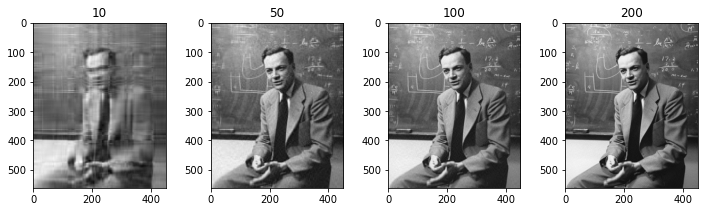

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
fig.tight_layout()

ax[0].imshow(feynman_10, cmap='gray')
ax[0].title.set_text('10')

ax[1].imshow(feynman_50, cmap='gray')
ax[1].title.set_text('50')

ax[2].imshow(feynman_100, cmap='gray')
ax[2].title.set_text('100')

ax[3].imshow(feynman_200, cmap='gray')
ax[3].title.set_text('200')

plt.show()

## Matriz Transposta

A matriz transposta $\mathbf{A}^T$ é definida pela fórmula $a{^T}_{ij} = a_{ji}$. Em outras palavras, obtemos a transposição por “virar” a matriz pela sua diagonal:

$$^{T}: \mathbb{R}^{m \times n} \rightarrow \mathbb{R}^{n \times m}$$

$$\left[\begin{array}{lll}{\alpha_{1}} & {\alpha_{2}} & {\alpha_{3}} \\ {\beta_{1}} & {\beta_{2}} & {\beta_{3}}\end{array}\right]^{\top}=\left[\begin{array}{ll}{\alpha_{1}} & {\beta_{1}} \\ {\alpha_{2}} & {\beta_{2}} \\ {\alpha_{3}} & {\beta_{3}}\end{array}\right]$$

In [21]:
A = np.array([[1,2,3],
              [4,5,6]])

A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## Determinante
A determinante de uma matriz é um procedimento que envolve todos os elementos da matriz, e que o resultado é um número único:

$$\operatorname{det}: \mathbb{R}^{n \times n} \rightarrow \mathbb{R}.$$

A determinante descreve a geometria relativa dos vetores que fazem as linhas de uma matriz. Mais especificamente, a determinante de uma matriz $\mathbf{A}$ diz respeito sobre o *volume* de uma caixa com os lados dados pelas linhas de $\mathbf{A}$.

A determinante de uma matriz $2 \times 2$ é:

$$\operatorname{det}(\mathbf{A})=\operatorname{det}\left(\left[\begin{array}{ll}{a} & {b} \\ {c} & {d}\end{array}\right]\right)=\left|\begin{array}{ll}{a} & {b} \\ {c} & {d}\end{array}\right|=a d-b c$$

In [22]:
A = np.array([[1,2],
              [3,4]])
np.linalg.det(A)

-2.0000000000000004

## Matrizes e Vetores no NumPy

Todas as matrizes e vetores são chamadas de `arrays` no NumPy

### Criando `array`

In [23]:
A = np.array([[1,2,3],
              [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

$$\left[\begin{array}{lll}{0} & {0} & {0} \\ {0} & {0} & {0}\end{array}\right]$$

In [24]:
A = np.zeros((2,3))
A

array([[0., 0., 0.],
       [0., 0., 0.]])

$$\left[\begin{array}{lll}{1} & {1} & {1} \\ {1} & {1} & {1}\end{array}\right]$$

In [25]:
A = np.ones((2,3))
A

array([[1., 1., 1.],
       [1., 1., 1.]])

$$I_3 = \left[\begin{array}{lll}{1} & {0} & {0} \\ {0} & {1} & {0} \\ {0} & {0} & {1} \end{array}\right]$$

In [26]:
A = np.eye(3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Intervalar

In [27]:
A = np.arange(1, 6, 1)
A

array([1, 2, 3, 4, 5])

In [28]:
A = np.linspace(0, 2, 9) # 9 números de 0 a 2
A

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [29]:
A = np.arange(6) # 1-D
print('A = ', A)

B = np.arange(12).reshape(4,3) # 2-D
print('B = ', B)

C = np.arange(24).reshape(2,3,4) # 3-D
print('C = ', C)

A =  [0 1 2 3 4 5]
B =  [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
C =  [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Randômicos

In [30]:
A = np.random.rand(3, 2) # float entre 0 e 1
A

array([[0.35245968, 0.83164809],
       [0.43466499, 0.71890695],
       [0.2685147 , 0.24717929]])

In [31]:
A = np.random.randint(1, 10, size = (3, 2)) # int entre 1 e 9
A

array([[6, 4],
       [1, 8],
       [6, 1]])

In [32]:
A = np.random.uniform(1, 10, size = (3, 2)) # float entre 1 e 9
A

array([[2.92027235, 4.84786549],
       [8.36575829, 6.6317421 ],
       [1.51658286, 8.48879708]])

In [33]:
A = np.random.normal(0, scale = 1, size = (3,2)) # normal media 0 e dp 1
A

array([[ 0.15504912, -2.06005365],
       [ 1.12981142, -1.04812038],
       [-1.95589203,  0.82455467]])

### Propriedades de `array`

In [34]:
A = np.array([[1,2,3],
              [4,5,6]])

In [35]:
A.ndim

2

In [36]:
A.shape

(2, 3)

In [37]:
A.size

6

### Operações de `array`

In [38]:
a = np.array([20,30,40,50])
b = np.array([0, 1, 2, 3])

a - b

array([20, 29, 38, 47])

In [39]:
b**2

array([0, 1, 4, 9])

In [40]:
a < 35

array([ True,  True, False, False])

#### Multiplicações

In [41]:
A = np.array([[1,1],
              [0,1]])
B = np.array([[2,0],
              [3,4]])

In [42]:
A * B # multiplicação elemento-por-elemento

array([[2, 0],
       [0, 4]])

In [43]:
A.dot(B) # multiplicação de Matriz

array([[5, 4],
       [3, 4]])

#### Operações Matemáticas

In [44]:
B = np.array([1,2,3])

print(np.exp(B))
print(np.sqrt(B))
print(np.log(B))

[ 2.71828183  7.3890561  20.08553692]
[1.         1.41421356 1.73205081]
[0.         0.69314718 1.09861229]


### Indexando e fatiando `array`

Arrays 1-D podem ser indexadas, fatiadas e iteradas que nem `list` e outras sequências Python

In [45]:
A = np.array([1,2,3,4,5,6,7,8,9,10])

print(A[2]) # terceiro elemento
print(A[2:5]) # terceiro a quinto
print(A[:6:2]) # primeiro a sexto elemento a cada 2 elementos

3
[3 4 5]
[1 3 5]


#### `arrays` Multidimensionais
`arrays` N-D ($N>1$) podem ser indexadas por eixo

In [46]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

print(A[1, 0]) # segunda linha, primeira coluna
print(A[:2, 1]) # primeira à segunda linha, apenas da segunda coluna

4
[2 5]


## Observação

Matrizes e Arrays em `NumPy` são *Row Major* e não *Column Major*. Ou seja a memória é alocada de maneira contígua usando uma lógica de linhas (*rows*) ao invés de colunas (*columns*).

* Geralmente linguagens de computação voltadas para computação científica são *Column Major*: `R`, `Fortran` e `Julia`.

* Geralmente linguagens de computação que tem uma relação muito próxima com `C` ou `C++` como `Python` são *Row Major*.

<img src="images/row-vs-cols_1.png" alt="Row vs Cols" style="width: 300px;"/>

<img src="images/row-vs-cols_2.png" alt="Row vs Cols" style="width: 300px;"/>

Então se você tiver que percorrer uma `np.ndarray` (Array `NumPy`) sempre faça primeiro pela linha (*row*) do que coluna (*column*):

In [47]:
def col_iter(x):
    s = 0
    for i in range(0, x.shape[1]):
        for j in range(0, x.shape[0]):
            s = s + x[j, i] ** 2
            x[j, i] = s

In [48]:
def row_iter(x):
    s = 0
    for i in range(0, x.shape[0]):
        for j in range(0, x.shape[1]):
            s = s + x[i, j] ** 2
            x[i, j] = s

In [49]:
import numpy as np
np.random.seed(123)
A = np.random.rand(1000, 1000)

In [50]:
%timeit col_iter(A)

/tmp/ipykernel_1095311/1500155154.py:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + x[j, i] ** 2


411 ms ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%timeit row_iter(A)

/tmp/ipykernel_1095311/3862385504.py:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + x[i, j] ** 2


304 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Estatísticas sobre matrizes

In [52]:
matriz = np.array(
    [ 
        [5.0, 6.0, 9.0, 1.0], 
        [7.0, 8.0, 3.0, 5.0],
        [1.0, 2.0, 3.0, 2.0],
    ])

print('Máximo.......:', matriz.max(axis=None))
print('Mínimo.......:', matriz.min(axis=None))
print('Soma.........:', matriz.sum(axis=None))
print('Média........:', matriz.mean(axis=None))
print('Variância....:', matriz.var(axis=None))
print('Desvio Padrão:', matriz.std(axis=None))
print('Ptp..........:', matriz.ptp(axis=None)) # diferença entre o maior e menor valor de uma matriz

Máximo.......: 9.0
Mínimo.......: 1.0
Soma.........: 52.0
Média........: 4.333333333333333
Variância....: 6.888888888888888
Desvio Padrão: 2.6246692913372702
Ptp..........: 8.0


### Estatísticas Por Eixo (`axis`)

`axis`:
* `0`: por linha (primeira dimensão da matriz)
* `1`: por coluna (segunda dimensão da matriz)

In [53]:
print('Máximo.......:', matriz.max(axis=1))
print('Mínimo.......:', matriz.min(axis=1))
print('Soma.........:', matriz.sum(axis=1))
print('Média........:', matriz.mean(axis=1))
print('Variância....:', matriz.var(axis=1))
print('Desvio Padrão:', matriz.std(axis=1))
print('Ptp..........:', matriz.ptp(axis=1)) # diferença entre o maior e menor valor de uma matriz

Máximo.......: [9. 8. 3.]
Mínimo.......: [1. 3. 1.]
Soma.........: [21. 23.  8.]
Média........: [5.25 5.75 2.  ]
Variância....: [8.1875 3.6875 0.5   ]
Desvio Padrão: [2.86138079 1.92028644 0.70710678]
Ptp..........: [8. 5. 2.]


## Sistemas Lineares

Sistemas lineares é um conjunto de equações lineares, com `m` equações e `n` incógnitas. A solução de um sistema linear é a solução de todas as equações lineares. Existem muitas maneiras de resolvermos um |sistema de equações lineares ou sistemas lineares, como quiser chamá-los.


<img src="images/sistema-linear.png" alt="Sistemas Lineares" style="width: 300px;"/>
<br>

Exemplo de uma equação linear:

<img src="images/exemplo-sistema-linear.png" alt="Exemplo de Sistema Linear" style="width: 300px;"/>

## Biblioteca SciPy

É uma biblioteca Open Source em linguagem Python que foi feita para matemáticos, cientistas e engenheiros. Também tem o nome de uma popular conferência de programação científica com Python.

Esta biblioteca foi desenvolvida para trabalhar com arrays NumPy, e fornece muitas rotinas amigáveis e bem eficientes como rotinas para integração numérica e otimização.

### Utilizando a `numpy` e `SciPy` para resolver o seguinte sistema linear

<img src="images/exemplo-sistema-linear.png" alt="Exemplo de Sistema Linear" style="width: 300px;"/>

In [54]:
from scipy import linalg

A = np.array( [
    [3, 2, -1], 
    [1, 3, 1], 
    [2, 2, -2] ] )

B = np.array( [ 
    [0], 
    [1], 
    [2] ])

A_inversa = linalg.inv(A)

resultado = A_inversa.dot(B)

print(resultado)

print('Valor de x:', resultado[0])
print('Valor de y:', resultado[1])
print('Valor de z:', resultado[2])

[[-1.]
 [ 1.]
 [-1.]]
Valor de x: [-1.]
Valor de y: [1.]
Valor de z: [-1.]


### Outra forma de resolução utilizando o método `solve`

In [55]:
A = np.array( [
    [3, 2, -1], 
    [1, 3, 1], 
    [2, 2, -2] ] )

B = np.array( [ 
    [0], 
    [1], 
    [2] ])

resultado = np.linalg.solve(A, B)

print(resultado)

print('Valor de x:', resultado[0])
print('Valor de y:', resultado[1])
print('Valor de z:', resultado[2])

[[-1.]
 [ 1.]
 [-1.]]
Valor de x: [-1.]
Valor de y: [1.]
Valor de z: [-1.]


## Atividade Matriz #1


<p>Dada a matriz M a seguir:</p>

$$M = \left[\begin{array}{lllll}
    {1} & {2} & {3} & {4} & {5}\\
    {7} & {-2} & {-6} & {1} & {-2}\\
    {4} & {5} & {-3} & {3} & {9}\\
    {4} & {6} & {7} & {2} & {-1}\\
    {8} & {-8} & {8} & {-8} & {9}\\
\end{array}\right]$$

<ol>
    <li>Qual é a inversa da matriz M?</li>
    <li>Qual é a transposta da matriz M?</li>
    <li>Qual é o determinante da matriz M para a terceira ordem?</li>
    <li>Apresentar para a matriz M: máximo, mínimo, soma, média, variância e desvio padrão</li>
    <li>Apresente os valores da Diagonal Principal da matriz (M)</li>
    <li>Apresente os valores da Diagonal Secundária da matriz (M)</li>
    <li>Apresente o somatório da Diagonal Principal da matriz (M)</li>
    <li>Apresente o somatório da Diagonal Secundária da matriz (M)</li>
</ol>

In [56]:
###